<h1>Correlation analyses between corruption and economics advancement and human development </h1>

This project aims to:  
 - Examine the relationships between corruption and growth for the period from 2012 to 2017  
 - Determine whether an increase or decrease in corruption ranking would affect economic and human development

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import warnings
warnings.filterwarnings('ignore')
py.sign_in('tina1510', 'frYje0m9qNaohOg2u4Ss')

C:\Users\tinan\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning:

Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning



### 1. Corruption Perception Index

In [2]:
#load cpi data, drop NaN, and rename columns
corruption = pd.read_excel('CPI2017.xlsx',sheet_name='CPI historical data 2012-2017', header=2)
corruption = corruption[['Country','Region','CPI score 2017','CPI score 2016','CPI score 2015','CPI score 2014',
                                   'CPI Score 2013','CPI Score 2012']]   
corruption = corruption.dropna(axis=0,how='any')
corruption = corruption.rename({'CPI score 2017':'cpi2017','CPI score 2016':'cpi2016', 'CPI score 2015':'cpi2015','CPI score 2014':'cpi2014','CPI Score 2013':'cpi2013','CPI Score 2012':'cpi2012'},axis=1)
corruption.head()

,Country,Region,cpi2017,cpi2016,cpi2015,cpi2014,cpi2013,cpi2012
0,New Zealand,AP,89.0,90.0,91.0,91.0,91.0,90.0
1,Denmark,WE/EU,88.0,90.0,91.0,92.0,91.0,90.0
2,Finland,WE/EU,85.0,89.0,90.0,89.0,89.0,90.0
3,Norway,WE/EU,85.0,85.0,88.0,86.0,86.0,85.0
4,Switzerland,WE/EU,85.0,86.0,86.0,86.0,85.0,86.0


In [3]:
no_region = corruption.drop('Region',axis=1)

#top 5 and bottom 5 ranking
top5 = no_region.iloc[:5,0].tolist()
bottom5 = no_region.iloc[-5:,0].tolist()

#rearrange and set indices 
corruption_melted = pd.melt(no_region, id_vars=['Country'], var_name='year', value_name='value')
corruption_melted  = corruption_melted.set_index(['Country','year']).sort_index()

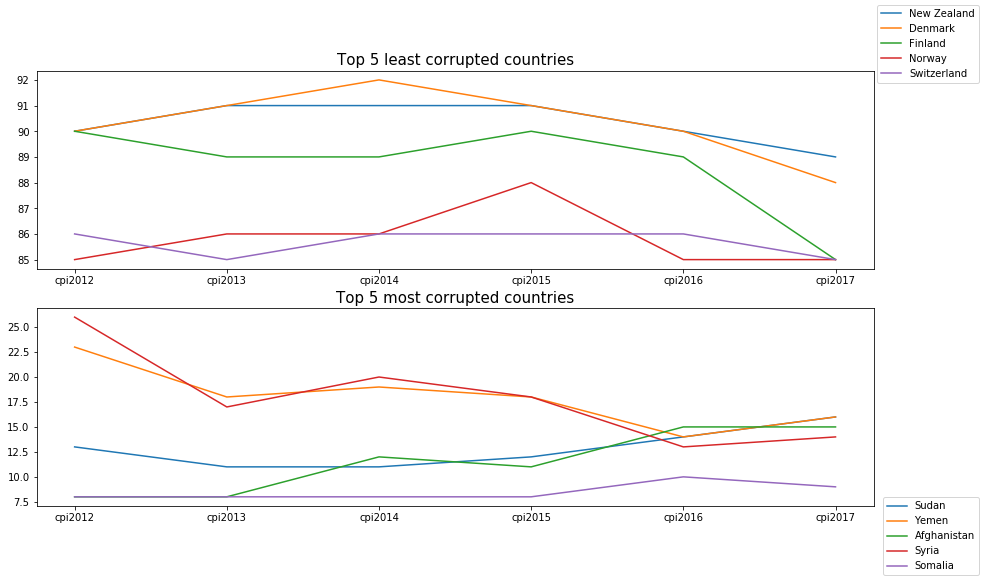

In [4]:
#plot the most 5 corrupted countries and least 5 corrupted countries

fig=plt.figure(figsize=(15,8))

plt.subplot(2, 1, 1)   
for country in top5:
    new1 = corruption_melted.loc[country]
    plt.plot(new1.index, new1.values)
fig.legend(top5)
plt.title('Top 5 least corrupted countries',fontsize=15)

plt.subplot(2, 1, 2)
for country in bottom5:
    new1 = corruption_melted.loc[country]
    plt.plot(new1.index, new1.values)
fig.legend(bottom5,loc=4)
plt.title('Top 5 most corrupted countries',fontsize=15)
plt.show()

In [5]:
#calulate CPI change in percentage
corruption['cpi_pct'] = round(((corruption['cpi2017'] - corruption['cpi2012'])/corruption['cpi2012'])*100,2)
corruption = corruption.sort_values(by='cpi_pct', ascending=False)
corruption.tail(2)

,Country,Region,cpi2017,cpi2016,cpi2015,cpi2014,cpi2013,cpi2012,cpi_pct
172,Guinea Bissau,SSA,17.0,16.0,17.0,19.0,19.0,25.0,-32.00
177,Syria,MENA,14.0,13.0,18.0,20.0,17.0,26.0,-46.15


In [6]:
#create a dataframe with only countries where cpi_pct changed the most
top5_pct = pd.DataFrame(corruption.iloc[0:5])
bottom5_pct = pd.DataFrame(corruption.iloc[-5:])
topvsbottom = pd.concat([top5_pct,bottom5_pct])
topvsbottom

,Country,Region,cpi2017,cpi2016,cpi2015,cpi2014,cpi2013,cpi2012,cpi_pct
170,"Korea, North",AP,17.0,12.0,8.0,8.0,8.0,8.0,112.50
131,Myanmar,AP,30.0,28.0,22.0,21.0,21.0,15.0,100.00
176,Afghanistan,AP,15.0,15.0,11.0,12.0,8.0,8.0,87.50
67,Belarus,ECA,44.0,40.0,32.0,31.0,29.0,31.0,41.94
137,Laos,AP,29.0,30.0,25.0,25.0,26.0,21.0,38.10
154,Madagascar,SSA,24.0,26.0,28.0,28.0,28.0,32.0,-25.00
102,Bahrain,MENA,36.0,43.0,51.0,49.0,48.0,51.0,-29.41
175,Yemen,MENA,16.0,14.0,18.0,19.0,18.0,23.0,-30.43
172,Guinea Bissau,SSA,17.0,16.0,17.0,19.0,19.0,25.0,-32.00
177,Syria,MENA,14.0,13.0,18.0,20.0,17.0,26.0,-46.15


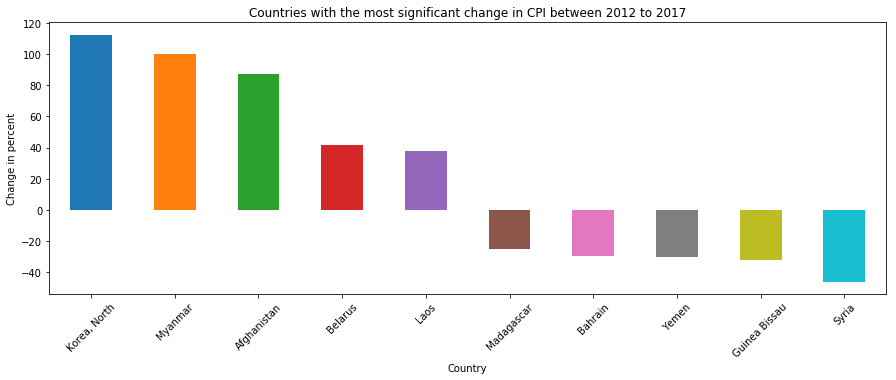

In [7]:
#plot the 10 countries where cpi percentage increased/decreased the most
topvsbottom.plot(x='Country',y='cpi_pct',kind='bar',legend=False, figsize=(15,5))
plt.xlabel('Country')
plt.ylabel('Change in percent')
plt.xticks(rotation=45)
plt.title('Countries with the most significant change in CPI between 2012 to 2017')
plt.show()

North Korea became less corrupted between 2012 and 2017 while Syria's ranking on the CPI dropped the most.  
People seem to be more optimistic about Kim Jong Un's regime  
New military-backed governemnt also helped Myanmar's ranking

In [8]:
#since North Korea, Laos, and Syria are not in gdp or hdi data, I dropped them to get the top5 and bottom5
corruption = corruption[corruption['Country'] != 'Laos'] 
corruption = corruption[corruption['Country'] != 'Korea, North'] 
corruption = corruption[corruption['Country'] != 'Syria']

#new topvsbottom dataframe with other countries in place of Laos, North Korea, and Syria
top5_pct = pd.DataFrame(corruption.iloc[0:5])
bottom5_pct = pd.DataFrame(corruption.iloc[-5:])
topvsbottom = pd.concat([top5_pct,bottom5_pct])

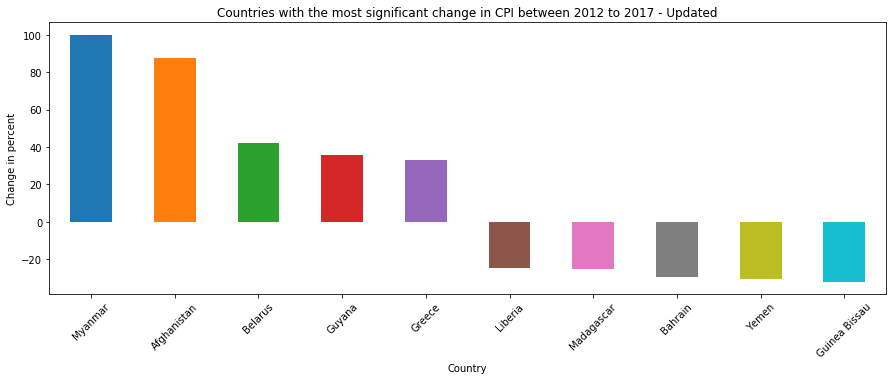

In [9]:
#plot the 10 countries where gdp percentage increased/decreased the most
topvsbottom.plot(x='Country',y='cpi_pct',kind='bar',legend=False, figsize=(15,5))
plt.xlabel('Country')
plt.ylabel('Change in percent')
plt.xticks(rotation=45)
plt.title('Countries with the most significant change in CPI between 2012 to 2017 - Updated')
plt.show()

### 2. Corruption Perception Index and GDP per capita

In [10]:
#load gdp data and select relevant columns
#corruption.drop('Region',axis=1,inplace=True)
gdp = pd.read_csv('GDP per capita PPP.csv',index_col=None, header=2)
gdp.drop(gdp.columns[3:-7], axis=1, inplace=True) #drop all the unnecessary columns year
gdp.drop(gdp.columns[[1,2,-1]], axis=1, inplace=True)

#change name of some countries so they are matched with the names in CPI dataset
gdp['Country Name'].replace(["Guinea"],['Guinea Bissau'],inplace=True)
gdp['Country Name'].replace(["Yemen, Rep."],['Yemen'],inplace=True)
gdp['Country Name'].replace('Syrian Arab Republic', 'Syria',inplace=True)

#rename columns
gdp = gdp.rename({'2012':'gdp2012','2013':'gdp2013','2014':'gdp2014','2015':'gdp2015','2016':'gdp2016','2017':'gdp2017'},axis=1)
gdp.tail()

,Country Name,gdp2012,gdp2013,gdp2014,gdp2015,gdp2016,gdp2017
259,Kosovo,8541.075270,8883.799982,9163.133397,9748.773845,10193.411050,10754.402167
260,Yemen,3863.288722,4007.821940,3968.105553,2458.385012,1595.186065,NaN
261,South Africa,12440.263095,12769.995154,13051.828338,13180.529241,13250.588325,13497.987801
262,Zambia,3574.058520,3701.392674,3826.626899,3862.478483,3938.663188,4050.261432
263,Zimbabwe,1905.837872,1997.052199,2028.019248,2036.319256,2027.084915,2085.676925


In [11]:
#using 2016 data for Yemen since 2017 is not available
gdp.iloc[-4,-1]= gdp.iloc[-4,-2] 
gdp.tail()

,Country Name,gdp2012,gdp2013,gdp2014,gdp2015,gdp2016,gdp2017
259,Kosovo,8541.075270,8883.799982,9163.133397,9748.773845,10193.411050,10754.402167
260,Yemen,3863.288722,4007.821940,3968.105553,2458.385012,1595.186065,1595.186065
261,South Africa,12440.263095,12769.995154,13051.828338,13180.529241,13250.588325,13497.987801
262,Zambia,3574.058520,3701.392674,3826.626899,3862.478483,3938.663188,4050.261432
263,Zimbabwe,1905.837872,1997.052199,2028.019248,2036.319256,2027.084915,2085.676925


In [12]:
#convert values to float
for i in gdp.loc[:, gdp.columns != 'Country Name']:
    gdp[i] = gdp[i].astype(float)

#calcuate percentage change in gdp per capita and mean between 2012 to 2017
gdp['gdp_pct'] = round(((gdp['gdp2017']-gdp['gdp2012'])/gdp['gdp2012'])*100,2)
gdp['mean_gdp'] = gdp.iloc[:, 1:-1].sum(axis=1)/6

In [13]:
cpi_gdp = pd.merge(corruption, gdp, left_on='Country',right_on='Country Name',how='left')
cpi_gdp.dropna(how='any',axis=0, inplace=True)
cpi_gdp.head()

,Country,Region,cpi2017,cpi2016,cpi2015,cpi2014,cpi2013,cpi2012,cpi_pct,Country Name,gdp2012,gdp2013,gdp2014,gdp2015,gdp2016,gdp2017,gdp_pct,mean_gdp
0,Myanmar,AP,30.0,28.0,22.0,21.0,21.0,15.0,100.00,Myanmar,4225.119352,4613.339782,5024.924363,5384.869389,5721.228004,6138.761026,45.29,5184.706986
1,Afghanistan,AP,15.0,15.0,11.0,12.0,8.0,8.0,87.50,Afghanistan,1873.153946,1913.160644,1937.235365,1926.357336,1944.117005,1980.516177,5.73,1929.090079
2,Belarus,ECA,44.0,40.0,32.0,31.0,29.0,31.0,41.94,Belarus,17801.918699,18271.754290,18903.159019,18347.140701,18089.050326,18847.933887,5.88,18376.826154
3,Guyana,AME,38.0,34.0,29.0,30.0,27.0,28.0,35.71,Guyana,6538.376581,6930.287694,7275.073685,7535.976471,7836.379176,8162.601540,24.84,7379.782525
4,Greece,WE/EU,48.0,44.0,46.0,43.0,40.0,36.0,33.33,Greece,25284.464077,26097.871901,26838.455228,26697.248504,26764.961606,27601.904924,9.17,26547.484373


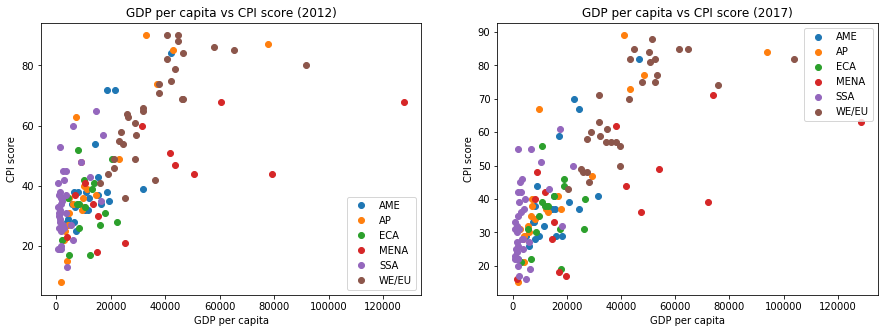

In [14]:
#plot GDP per capita vss CPI score for 2012 and 2017
groups = cpi_gdp.groupby('Region')

# Plot
fig, ax = plt.subplots(figsize=(15,5))

plt.subplot(1,2,1)
for name, group in groups:
    plt.plot(group['gdp2012'], group['cpi2012'], marker='o', linestyle='',  label=name)
plt.legend()
plt.xlabel('GDP per capita')
plt.ylabel('CPI score')
plt.title('GDP per capita vs CPI score (2012)')

plt.subplot(1,2,2)
for name, group in groups:
    plt.plot(group['gdp2017'], group['cpi2017'], marker='o', linestyle='',  label=name)
plt.legend()
plt.xlabel('GDP per capita')
plt.ylabel('CPI score')
plt.title('GDP per capita vs CPI score (2017)')

plt.show()

There is a positive correlation between CPI ranking and GDP per capita

In [15]:
inds = topvsbottom['Country'].values

#find the indices of the most and least corrupted countries in the cpi_gdp dataframe
indices1=[]
for i in inds:
    try:
        ind = cpi_gdp['Country'].tolist().index(i)
        indices1.append(ind)
    except: 
        continue

In [16]:
#plot the change in CPI vs change in GDP
trace=dict(type='scatter',
            x=cpi_gdp['gdp_pct'],
            y=cpi_gdp['cpi_pct'],
            text=cpi_gdp['Country'],
            mode='markers',
            selectedpoints=indices1,
                      selected=dict(marker=dict(color='red',size=10)),#color of selected points
                      unselected=dict(marker=dict(color='rgba(0, 45, 240)',#color of unselected pts
                                      opacity=0.9)
                                     )
                     )  
                       
layout=dict(title='Change in CPI vs GDP per capita between 2012 and 2017 (%)',xaxis=dict(title='Change in GDP per captia (%)'),yaxis=dict(title='Change in CPI (%)'),hovermode='closest'
           )
fig=dict(data=[trace], layout=layout)
py.iplot(fig,validate=False, filename='CPI vs GDP per capita')

### 3. Corruption Perception Index and Human Development Index

In [17]:
#loading data and select relevant columns
hdi = pd.read_csv('Human Development Index (HDI).csv',header=1,encoding='cp1252')
hdi = hdi.iloc[:,[1,-6,-5,-4,-3,-2,-1]]
hdi = hdi.rename({'2012':'hdi2012','2013':'hdi2013','2014':'hdi2014','2015':'hdi2015','2016':'hdi2016','2017':'hdi2017'},axis=1)

#values range from 0-1, multiply them by 100 so they are on the same scale with CPI
hdi.iloc[:, 1:] = hdi.iloc[:, 1:]*100 

#fuzzy matching country name in hdi dataset to country name in corruption dataset
hdi['key']=hdi['Country'].apply(lambda x : [process.extract(x, corruption['Country'], limit=1)][0][0][0])
hdi.head(2)

,Country,hdi2012,hdi2013,hdi2014,hdi2015,hdi2016,hdi2017,key
0,Afghanistan,48.2,48.7,49.1,49.3,49.4,49.8,Afghanistan
1,Albania,76.7,77.1,77.3,77.6,78.2,78.5,Albania


In [18]:
#merge hdi dataframe to corruption dataframe and calculate the percentage change of hdi
cpi_hdi = pd.merge(corruption,hdi, left_on='Country',right_on='key',how='left')
cpi_hdi['hdi_pct'] = ((cpi_hdi['hdi2017']-cpi_hdi['hdi2012'])/cpi_hdi['hdi2012'])*100
cpi_hdi.dropna(how='any',axis=0, inplace = True) #drop NaN values
cpi_hdi.drop(['Country_y','key'],axis=1,inplace=True) #drop extra country columns 
cpi_hdi.sort_values(by='hdi_pct',ascending=False,inplace=True) #sort values by hdi_pct
cpi_hdi.head(2)

,Country_x,Region,cpi2017,cpi2016,cpi2015,cpi2014,cpi2013,cpi2012,cpi_pct,hdi2012,hdi2013,hdi2014,hdi2015,hdi2016,hdi2017,hdi_pct
104,Democratic Republic of the Congo,SSA,21.0,21.0,22.0,22.0,22.0,21.0,0.00,42.0,42.6,43.6,44.4,45.2,45.7,8.809524
7,Côte D'Ivoire,SSA,36.0,34.0,32.0,32.0,27.0,29.0,24.14,45.4,46.2,46.5,47.8,48.6,49.2,8.370044


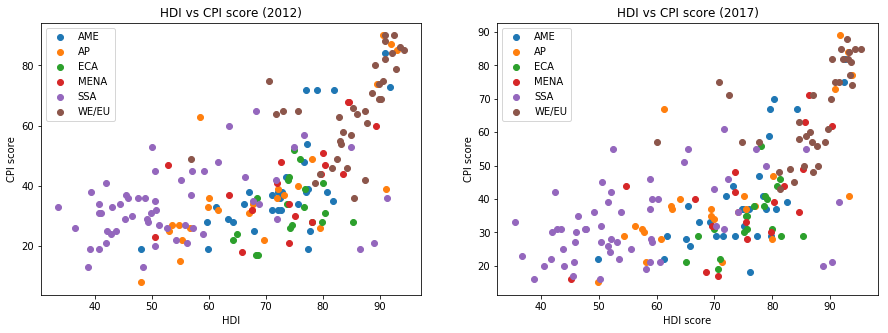

In [19]:
#plot the CPI and HDI score of all countries in 2012 and 2017

groups = cpi_hdi.groupby('Region')

# Plot
fig, ax = plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
for name, group in groups:
    plt.plot(group['hdi2012'], group['cpi2012'], marker='o', linestyle='',  label=name)
plt.legend()
plt.xlabel('HDI')
plt.ylabel('CPI score')
plt.title('HDI vs CPI score (2012)')

plt.subplot(1,2,2)
for name, group in groups:
    plt.plot(group['hdi2017'], group['cpi2017'], marker='o', linestyle='',  label=name)
plt.legend()
plt.xlabel('HDI score')
plt.ylabel('CPI score')
plt.title('HDI vs CPI score (2017)')
plt.show()

In [20]:
#find the indices of the countries where cpi change the most in the cpi_hdi dataframe
inds = topvsbottom['Country'].values

indices=[]
for i in inds:
    ind = cpi_hdi['Country_x'].tolist().index(i)
    indices.append(ind)

In [21]:
#plot the change in cpi vs change in hdi, highlight the countries where cpi percentage changed the most
trace=dict(type='scatter',
            x=cpi_hdi['hdi_pct'],
            y=cpi_hdi['cpi_pct'],
            text=cpi_hdi['Country_x'],
            mode='markers',
            selectedpoints=indices,
                      selected=dict(marker=dict(color='red',size=10)),#color of selected points
                      unselected=dict(marker=dict(color='rgba(0, 45, 240)',#color of unselected pts
                                      opacity=0.9)
                                     )
                     )  
                       
layout=dict(title='Change in CPI vs HDI between 2012 and 2017 (%)',xaxis=dict(title='Change in HDI (%)'),yaxis=dict(title='Change in CPI (%)'),hovermode='closest'
           )
fig=dict(data=[trace], layout=layout)
py.iplot(fig,validate=False, filename='CPI vs HDI')

__Source__<br>
CPI data: https://www.gapminder.org/data/ <br>
GDP per capita data: https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD <br>
HDI data: http://hdr.undp.org/en/data